In [6]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [7]:
df=pd.read_csv('Car_Price_Prediction.csv',usecols=['Engine Size','Mileage','Price'])

In [8]:
df.head()

,Engine Size,Mileage,Price
0,3.9,74176,30246.207931
1,1.7,94799,22785.747684
2,4.1,98385,25760.290347
3,2.6,88919,25638.003491
4,3.4,138482,21021.386657


In [9]:
cols=['Engine Size','Price']
df[cols]=df[cols].round().astype(int)

In [10]:
df.head()

,Engine Size,Mileage,Price
0,4,74176,30246
1,2,94799,22786
2,4,98385,25760
3,3,88919,25638
4,3,138482,21021


In [11]:
df.isnull().sum()

Engine Size    0
Mileage        0
Price          0
dtype: int64

In [12]:
df.shape

(1000, 3)

In [27]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\gadit\AppData\Local\Temp\ipykernel_26464\1397052259.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(price_series)


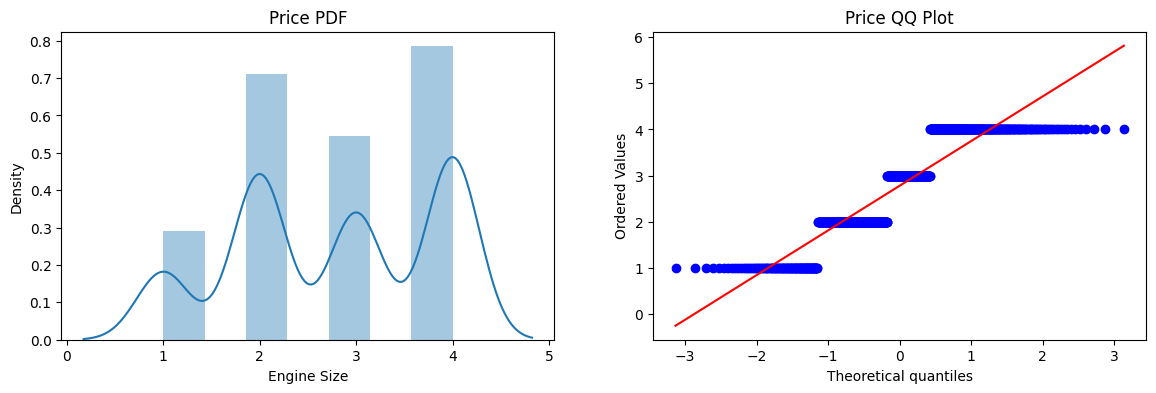

In [29]:
price_series = y_train
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(price_series)
plt.title('Price PDF')

plt.subplot(122)
stats.probplot(price_series, dist="norm", plot=plt)
plt.title('Price QQ Plot')

plt.show()


C:\Users\gadit\AppData\Local\Temp\ipykernel_26464\775319734.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Mileage'])


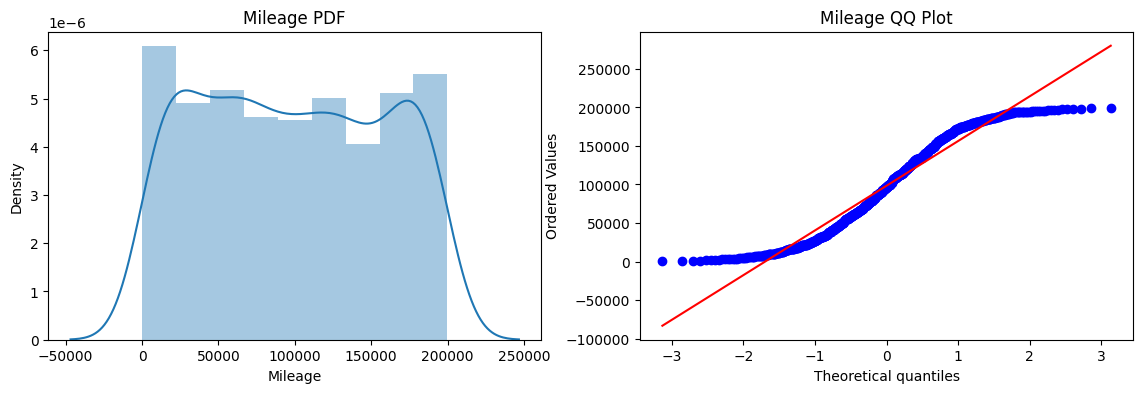

In [31]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Mileage'])
plt.title('Mileage PDF')

plt.subplot(122)
stats.probplot(X_train['Mileage'], dist="norm", plot=plt)
plt.title('Mileage QQ Plot')

plt.show()


In [33]:
from sklearn.metrics import r2_score, mean_absolute_error

lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()

lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred_lr))
print("Accuracy DT",accuracy_score(y_test,y_pred_dt))

Accuracy LR 0.365
Accuracy DT 0.33


In [35]:
trf = FunctionTransformer(func=np.log1p)
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [39]:
clf = LogisticRegression(max_iter=1000)
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.36
Accuracy DT 0.335


In [43]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression(max_iter=1000)
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.40700000000000003
DT 0.34199999999999997


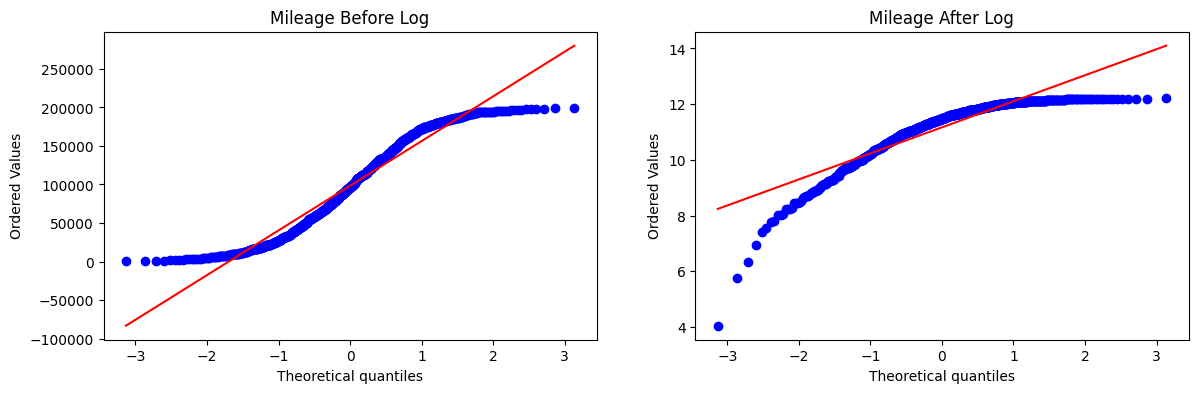

In [45]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Mileage'], dist="norm", plot=plt)
plt.title('Mileage Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Mileage'], dist="norm", plot=plt)
plt.title('Mileage After Log')

plt.show()

In [47]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Mileage'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [49]:
clf = LogisticRegression(max_iter=1000)
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.36
Accuracy DT 0.31


In [55]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression(max_iter=1200)
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.414
DT 0.351


In [65]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Mileage'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression(max_iter=1500)
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Mileage'], dist="norm", plot=plt)
    plt.title('Mileage Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Mileage After Transform')

    plt.show()
    

Accuracy 0.41900000000000004


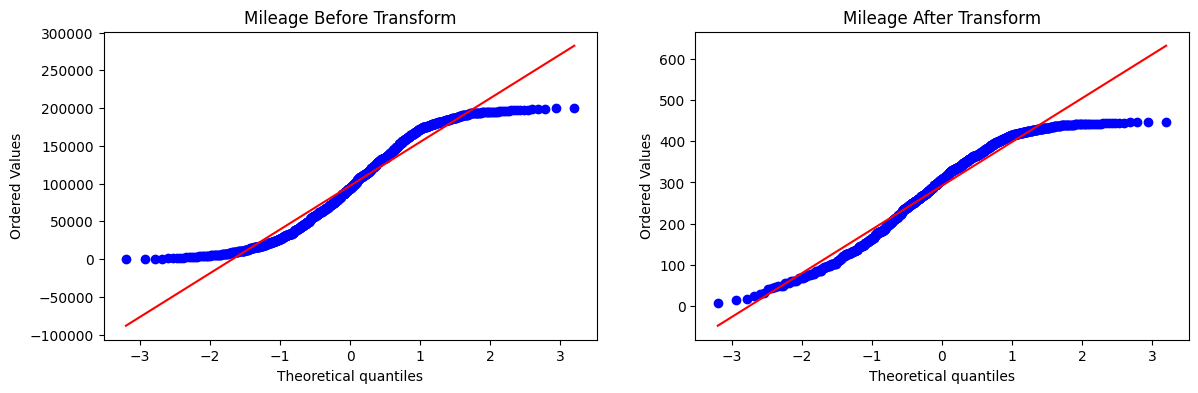

In [79]:
apply_transform(lambda x:x**(1/2))